In [ ]:
import pandas as pd              # untuk manipulasi data
import numpy as np               # untuk handling nilai dan operasi numerik
import matplotlib.pyplot as plt  # untuk plotting grafik
import seaborn as sns            # visualisasi data

from sklearn.preprocessing import StandardScaler  # kalau mau scaling

# **House recomendation for Mr Cho**
## using CRISP-DM method

# **Business** **Understanding**
The Client (Mr Cho) Want a new Home. but he unsure which one he wanna get. so he check the data below

# **Data Undestanding**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_porto_2.csv to data_porto_2.csv


In [ ]:
df = pd.read_csv('data_porto_2.csv')

# see 5 head
df.head()

# Info Column
df.info()

# Statistic descriptive
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# **Data preparation**


1.   Handle Missing Value
2.   Handle Duplicated
3.   Handle Outlier (with IQR)
4.   Handle Inconsistency (Example year>=2050)
5.   Convert data type if needed



In [ ]:
# 1. Check missing value
print("Missing values per kolom:")
print(df.isnull().sum())

# 2. Drop duplicate
print("Jumlah data sebelum drop duplikat:", df.shape[0])
df.drop_duplicates(inplace=True)
print("Jumlah data setelah drop duplikat:", df.shape[0])

# 3. Cek outlier with IQR
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')

# 4. Cek Data Inconsistency
print("Tahun pembangunan min:", df['yr_built'].min())
print("Tahun renovasi max:", df['yr_renovated'].max())
print("Harga min:", df['price'].min())

Missing values per kolom:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
Jumlah data sebelum drop duplikat: 4600
Jumlah data setelah drop duplikat: 4600
price: 240 outliers
bedrooms: 118 outliers
bathrooms: 141 outliers
sqft_living: 129 outliers
sqft_lot: 541 outliers
floors: 0 outliers
waterfront: 33 outliers
view: 460 outliers
condition: 6 outliers
sqft_above: 116 outliers
sqft_basement: 82 outliers
yr_built: 0 outliers
yr_renovated: 0 outliers
Tahun pembangunan min: 1900
Tahun renovasi max: 2014
Harga min: 0.0


# **Summary**
* Missing Value : None
* Duplicate : None
* Outlier: some of them have significance outlier price: 240, sqft_lot: 541, view: 460, and others. But this outlier doesnt mean there is 100% problems exist there
* inconsistency : yr_built min = 1900 → valid, yr_renovated max = 2014 → still valid, Harga minimum (minimum price) = 0.0 → ***this suspicious.***

**we can check what the house looks like (either its null, damaged, atau or false data)**



In [ ]:
df[df['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


The house have a good data but the price is 0, this maybe false input problem so we dropped this data

In [ ]:
# Delete houses whose price is 0
df = df[df['price'] > 0]
print("Jumlah data setelah hapus harga 0:", df.shape[0])

Jumlah data setelah hapus harga 0: 4551


Other than the data that we dropped before, now we need to check the outlier. we can do it by visualizing with boxplot.

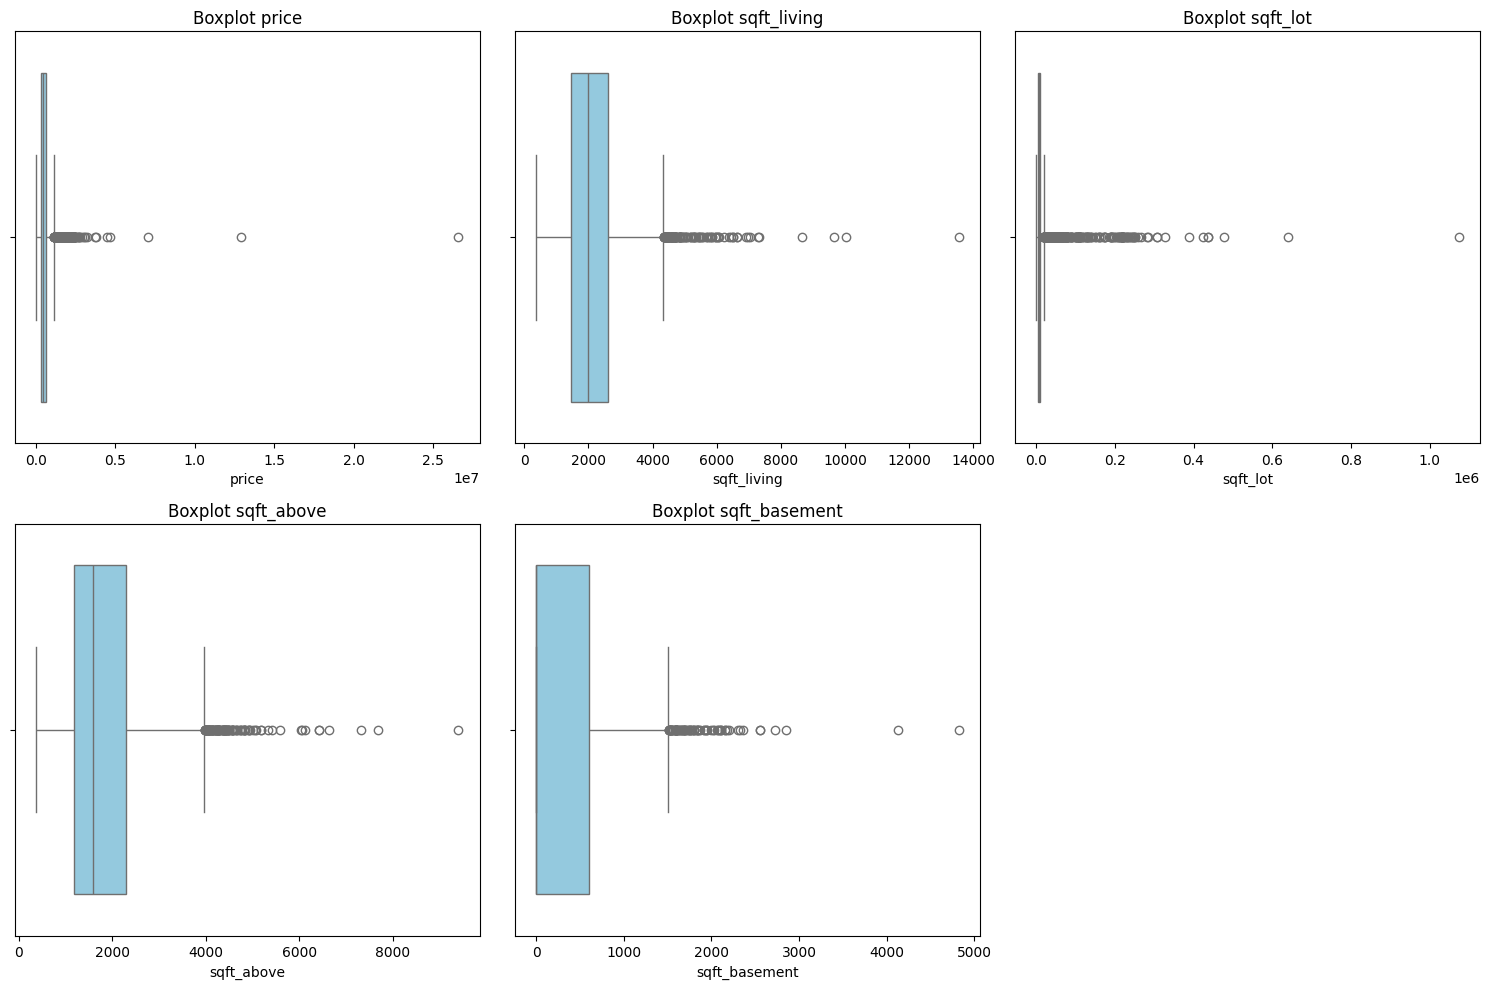

In [ ]:
# Select the features that most often have outliers
cols_to_plot = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.show()

# why we choose this outlier ?

*   price ✅ Yes There are extremely expensive houses
*   bedrooms ❌ Skip it Houses with 7-10 rooms can really exist, not an error
*   bathrooms ❌ Skip it Same as bedrooms — some luxury houses can have 5+ bathrooms
*   sqft_living ✅ Yes Extreme values ​​can distort the distribution (eg houses 10x larger)
*   sqft_lot ✅ Yes Many houses have very large land, but the amount is minor (long tail)
*   waterfront ❌ Skip it There are only 2 values ​​(0 and 1), not continuous numeric data (so false outliers)
*   view ❌ Skip it Ordinal scale 0-4, no need to handle with IQR
*   condition ❌ Skip it Scale 1-5, safe and relatively balanced
*   sqft_above ✅ Yes Almost the same pattern as sqft_living, and can distort the analysis
*   sqft_basement ✅ Yes, there are some houses with really big basements.
*   yr built and year renovated is 0 outlier so it self explanatory (not included)





## The Conclusion by the boxplot above is
* price : There are houses with prices >25 million USD → most likely extreme outliers
* sqft_living : Houses with living space >10,000 sqft → very rare, can be cut
* sqft_lot : Lot size >400,000 sqft → can be disturbing because it is too extreme
* sqft_above :  Outliers are quite far at >7,000 sqft → prone to disturbing visualization/ML
* sqft_basement : There is a super large basement (4,000–5,000 sqft) → can be considered noise

# **so we can solve this by**


1.   Replace Outlier with NaN
2.   Change NaN with Median. so the data distribution become stable


In [ ]:
outlier_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].apply(lambda x: x if pd.notna(x) and lower <= x <= upper else np.nan)

# NaN content using the median of the respective column
df[outlier_cols] = df[outlier_cols].fillna(df[outlier_cols].median())

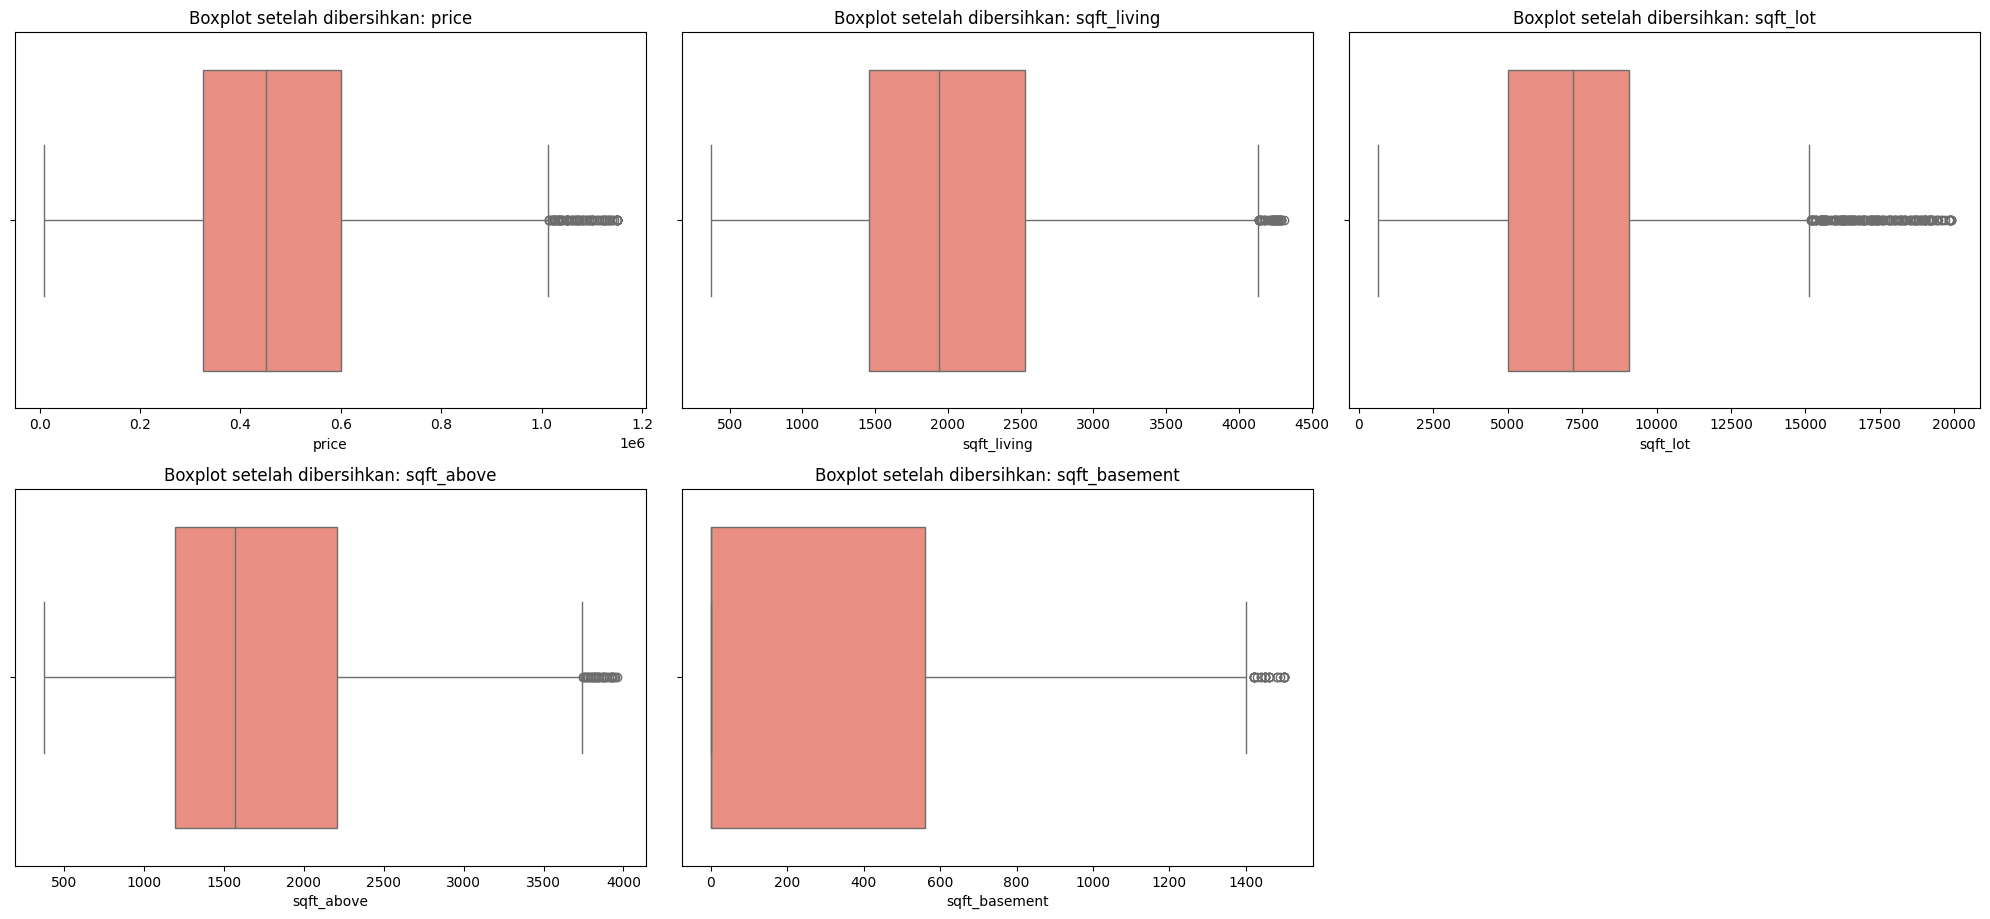

In [ ]:
fix_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Re-visualize boxplot after handling outliers
plt.figure(figsize=(20, 18))

for i, col in enumerate(fix_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot setelah dibersihkan: {col}')
    plt.tight_layout()

plt.show()

Now the data has been cleaned (check image above). so we can continue to EDA (explanatory data analysts)

# Explanatory Data Analyst
first we check the distribution of house price

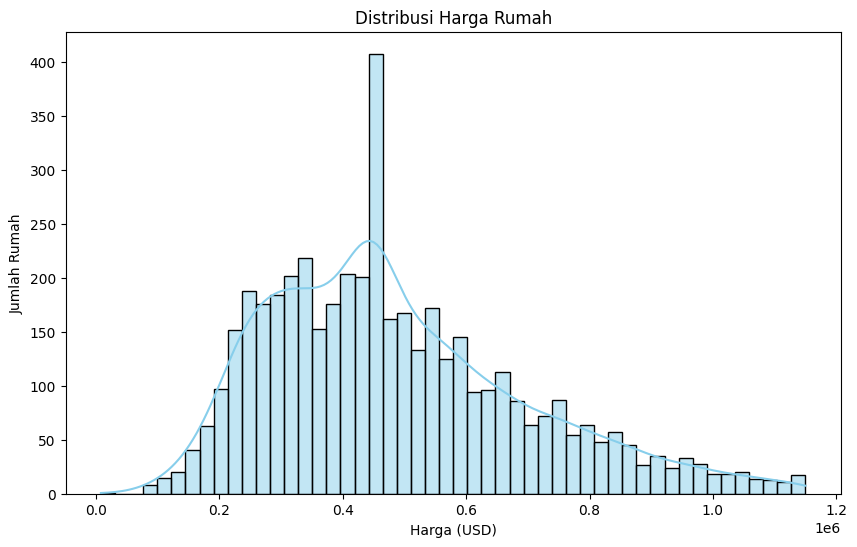

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga (USD)')
plt.ylabel('Jumlah Rumah')
plt.show()

The distribution of house prices shows a right-skewed pattern.
The majority of house prices are in the range of 200,000usd–600,000usd, with the peak distribution around 450,000 usd. This means that the market is dominated by mid-priced houses, while houses priced above $1 million are only a small portion — which is normal and common in the property market.

next we check each attributes colleration especially price with other atributes

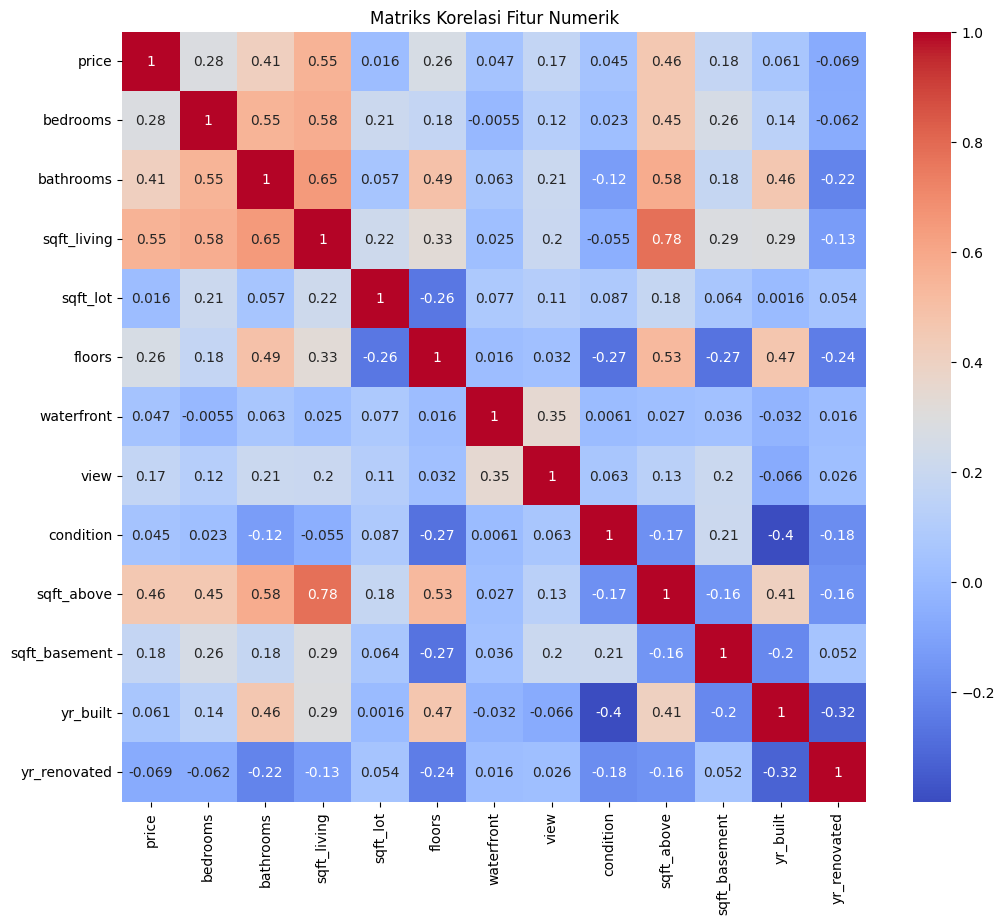

In [ ]:
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

it looks like we found something here:


*   The larger the living space, the higher the house price.(price and sqft living correlation
*   The number of bathrooms is also a strong indicator of price.
*   The area of ​​the upper part of the house (without the basement) also affects the price.
*   the bedroom amount had Little influence, but still logical

other than that we have too:
*   Land area does not affect price much (sqft_lot)
*   House condition does not seem to have a strong correlation with price
*   waterfront have weak negative correlation, because there are very few houses on the waterfront




next we check boxplot for house price and distribution with house condition

<ipython-input-12-dbe9b047b0e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df, palette='Set2')


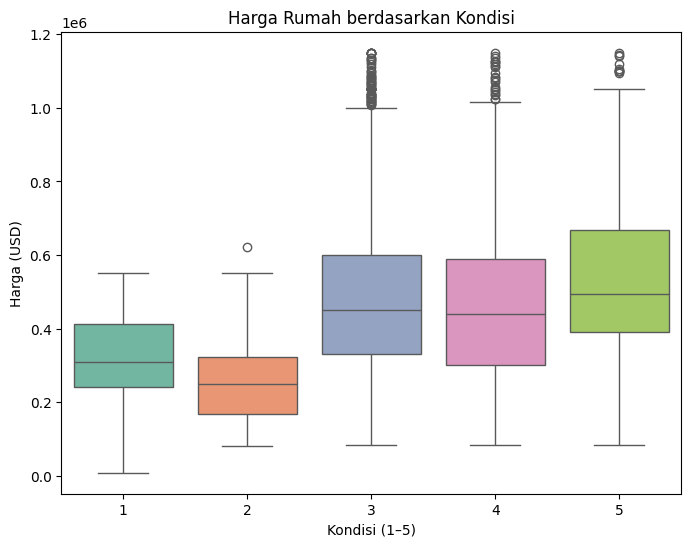

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='condition', y='price', data=df, palette='Set2')
plt.title('Harga Rumah berdasarkan Kondisi')
plt.xlabel('Kondisi (1–5)')
plt.ylabel('Harga (USD)')
plt.show()

by this graph we get information
* Houses with conditions 1 or 2 tend to have lower prices and narrow distribution

* Houses with conditions 4 and 5 have a wider price distribution, including expensive outliers

* Condition 3 is the most common category (lots of data there), and its median price is quite stable

After that we see the size of newer house rather than old houses differences

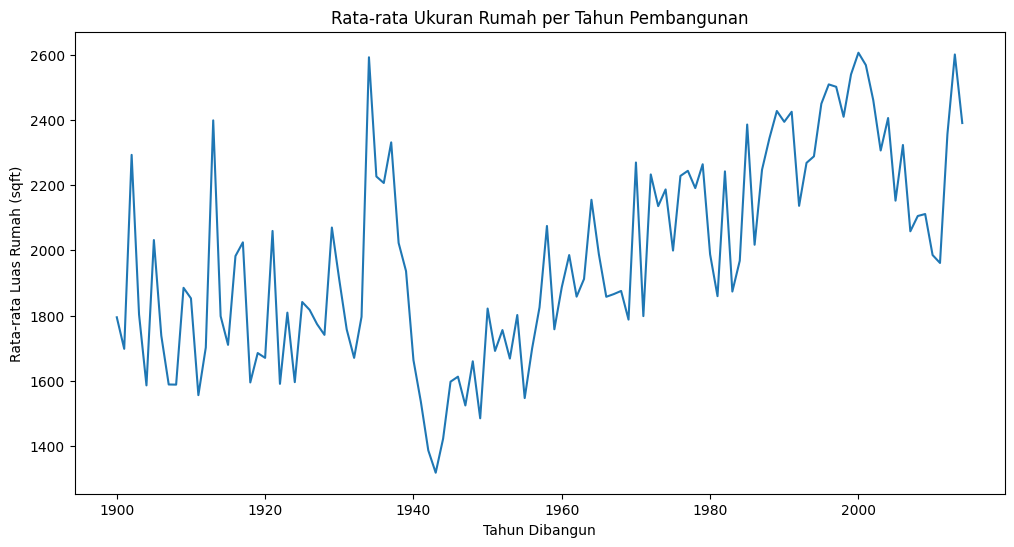

In [ ]:
df_grouped = df.groupby('yr_built')['sqft_living'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='yr_built', y='sqft_living', data=df_grouped)
plt.title('Rata-rata Ukuran Rumah per Tahun Pembangunan')
plt.xlabel('Tahun Dibangun')
plt.ylabel('Rata-rata Luas Rumah (sqft)')
plt.show()

The graph shows a trend that the average house size tends to increase over time, especially after the 1950s. There are some fluctuations in the early years (1900–1940), but the trend stabilizes and rises sharply after 1980–1990.

# Another insight that can we get:

* Homes built after 1990 tend to be larger than older homes

* This fits modern needs — bigger families, more space

* For Mr. Cho, homes built after 1990 are not only newer, but also more spacious in general.

Next we check average price of house for each city

<ipython-input-14-793d4fe23fbe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_city.values, y=df_city.index, palette='viridis')


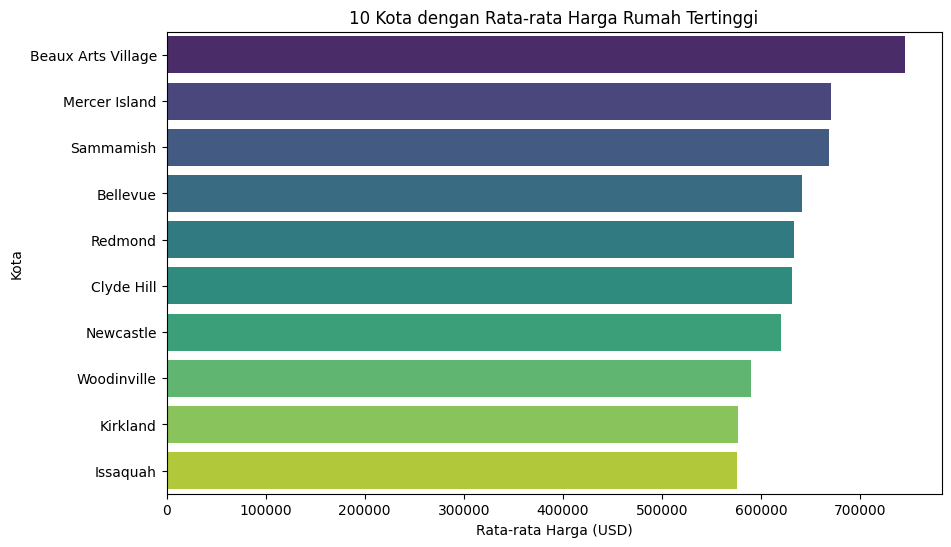

In [ ]:
df_city = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=df_city.values, y=df_city.index, palette='viridis')
plt.title('10 Kota dengan Rata-rata Harga Rumah Tertinggi')
plt.xlabel('Rata-rata Harga (USD)')
plt.ylabel('Kota')
plt.show()

by this graph we found:
* Beaux Arts Village is the most expensive city, with a median price of > $740,000

* Followed by Mercer Island, Sammamish, and Bellevue — Seattle's elite suburbs

* These cities are generally known for their full-service amenities, high accessibility, and large-scale properties

by this we can give mr cho insight :
If Mr. Cho has a limited budget, avoid these premium cities. But if he wants a long-term investment with rising property values, cities like Sammamish or Bellevue can be considered because they still have high quality but are not as extreme as Mercer Island.

now we can continue on filtering data for mr cho best house:


# **Mr. Cho's criteria:**

* House built ≥ 1990, or

* If built < 1990, then it must have been renovated > 2000

In [ ]:
# mr cho criteria
filtered_df = df[
    (df['yr_built'] >= 1990) |
    ((df['yr_built'] < 1990) & (df['yr_renovated'] > 2000))
]

print("Jumlah rumah yang memenuhi kriteria:", len(filtered_df))
filtered_df.head()

Jumlah rumah yang memenuhi kriteria: 2250


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340.0,7912.0,1.5,0,0,3,1340.0,0.0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.0,1520.0,6200.0,1.5,0,0,3,1520.0,0.0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA
13,2014-05-02 00:00:00,365000.0,3.0,1.0,1090.0,6435.0,1.0,0,0,4,1090.0,0.0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA
17,2014-05-02 00:00:00,367500.0,4.0,3.0,3110.0,7231.0,2.0,0,0,3,3110.0,0.0,1997,0,11224 SE 306th Pl,Auburn,WA 98092,USA
19,2014-05-02 00:00:00,275000.0,3.0,1.5,1180.0,10277.0,1.0,0,0,3,1180.0,0.0,1983,2009,12425 415th Ave SE,North Bend,WA 98045,USA


### 🏠 1. Budget Friendly (Cheapest Price)

If Mr. Cho wants a house with the most economical price without sacrificing the main requirements, here are 10 houses with the cheapest prices that pass the criteria.

> Suitable for quick purchases or as short-term investments with limited capital.


In [ ]:
# take relevaant column
rekomendasi_df = filtered_df[[
    'price', 'bedrooms', 'bathrooms', 'sqft_living',
    'yr_built', 'yr_renovated', 'city', 'street'
]]

In [ ]:
#Budget Friendly (10 rumah termurah)
rekom_budget = rekomendasi_df.sort_values(by='price').head(10)
rekom_budget.reset_index(drop=True, inplace=True)
rekom_budget

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,street
0,83300.0,3.0,2.00,1490.0,1990,0,Covington,26017 189th Ave SE
1,90000.0,2.0,1.00,580.0,1943,2002,Seattle,6621 S 131st Pl
2,90000.0,2.0,1.00,790.0,1973,2013,Kirkland,14710 122nd Pl NE
3,100000.0,2.0,1.00,910.0,1956,2001,Algona,138 Seattle Blvd S
4,110000.0,2.0,1.00,800.0,1927,2011,Seattle,12231 14th Ave S
5,129000.0,2.0,1.00,1150.0,1950,2005,Renton,17029 106th Ave SE
6,132250.0,4.0,2.25,1830.0,1991,0,Kent,12116 SE 261st Ct
7,132250.0,4.0,2.25,2192.0,2006,0,Kent,26429 106th Ave SE
8,132500.0,3.0,1.00,1080.0,1967,2011,Auburn,4411 S 314th St
9,134000.0,2.0,1.50,980.0,1922,2003,Skykomish,235 Thelma St


### 💸 2. Value for Money (Cheapest Price per sqft)

This category features homes that provide the **best value per square meter**. This means that the price of the home is relatively cheaper compared to the size offered.

> Suitable for buyers who want to get **maximum space with an efficient budget.**

In [ ]:
# Value for Money (value/sqft with lowest price)
rekomendasi_df['price_per_sqft'] = rekomendasi_df['price'] / rekomendasi_df['sqft_living']
rekom_value = rekomendasi_df.sort_values(by='price_per_sqft').head(10)
rekom_value.reset_index(drop=True, inplace=True)
rekom_value

<ipython-input-18-3e46ec9c42d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rekomendasi_df['price_per_sqft'] = rekomendasi_df['price'] / rekomendasi_df['sqft_living']


,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,street,price_per_sqft
0,83300.000000,3.0,2.00,1490.0,1990,0,Covington,26017 189th Ave SE,55.906040
1,132250.000000,4.0,2.25,2192.0,2006,0,Kent,26429 106th Ave SE,60.333029
2,132250.000000,4.0,2.25,1830.0,1991,0,Kent,12116 SE 261st Ct,72.267760
3,237333.333333,3.0,2.75,3010.0,2011,0,Sammamish,2868 258th Pl SE,78.848283
4,297857.142857,4.0,2.50,3490.0,2003,0,Covington,16102 SE 251 St,85.345886
5,149000.000000,3.0,1.00,1700.0,1955,2005,Seattle,12701 2nd Ave SW,87.647059
6,293000.000000,4.0,2.50,3250.0,1973,2013,Auburn,17101-17103 SE 383rd St,90.153846
7,180000.000000,3.0,2.25,1990.0,1967,2011,Des Moines,24433 14th Ave S,90.452261
8,234975.000000,4.0,2.75,2520.0,1999,0,Duvall,28509 NE 149th Pl,93.244048
9,235000.000000,5.0,2.50,2500.0,1979,2014,Des Moines,1630 S 231st Pl,94.000000


### 🏡 3. Spacious Homes

For Mr. Cho who prioritizes comfort and spacious living space, here are the 10 largest homes on the list.

> Suitable for large families, home offices, or those who need additional space.

In [ ]:
# Spacious Home
rekom_spacious = rekomendasi_df.sort_values(by='sqft_living', ascending=False).head(10)
rekom_spacious.reset_index(drop=True, inplace=True)
rekom_spacious

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,street,price_per_sqft
0,450000.0,4.0,3.25,4290.0,1997,0,Bellevue,17892 SE 58th Pl,104.895105
1,792500.0,4.0,2.50,4290.0,2004,2003,Ravensdale,26735 SE 271st St,184.731935
2,734950.0,4.0,3.25,4280.0,2002,0,Auburn,33518 161st Ln SE,171.717290
3,450000.0,4.0,3.50,4280.0,2005,0,Bellevue,1415 108th Ave SE,105.140187
4,450000.0,4.0,4.00,4270.0,2004,2003,Issaquah,1645 30th Ave NE,105.386417
5,450000.0,5.0,4.50,4270.0,2007,0,Kirkland,11017 101st Pl NE,105.386417
6,975000.0,4.0,2.50,4270.0,1991,0,Redmond,21502 NE 103rd St,228.337237
7,1000000.0,4.0,3.00,4260.0,1996,0,Sammamish,2432 267th Ct SE,234.741784
8,1065000.0,4.0,3.75,4260.0,2008,0,Kirkland,7811 126th Ave NE,250.000000
9,435000.0,4.0,3.00,4260.0,2000,0,Mercer Island,7436 SE 76th St,102.112676


## 🔍 Additional Insights for Mr. Cho

- Cities like **Bellevue** and **Mercer Island** offer elite neighborhoods, but prices are much higher. Suitable for long-term investment.
- Homes with **renovations after 2000** tend to have modern interiors even though they were built a long time ago.
- Homes tend to be larger after 1990, suitable for modern needs.
- If Mr. Cho is considering a work location, he should re-map the city vs. commute time.

In [ ]:
# Tampilkan 3 tabel rekomendasi (udah kamu punya sebelumnya)
rekom_budget

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,street
0,83300.0,3.0,2.00,1490.0,1990,0,Covington,26017 189th Ave SE
1,90000.0,2.0,1.00,580.0,1943,2002,Seattle,6621 S 131st Pl
2,90000.0,2.0,1.00,790.0,1973,2013,Kirkland,14710 122nd Pl NE
3,100000.0,2.0,1.00,910.0,1956,2001,Algona,138 Seattle Blvd S
4,110000.0,2.0,1.00,800.0,1927,2011,Seattle,12231 14th Ave S
5,129000.0,2.0,1.00,1150.0,1950,2005,Renton,17029 106th Ave SE
6,132250.0,4.0,2.25,1830.0,1991,0,Kent,12116 SE 261st Ct
7,132250.0,4.0,2.25,2192.0,2006,0,Kent,26429 106th Ave SE
8,132500.0,3.0,1.00,1080.0,1967,2011,Auburn,4411 S 314th St
9,134000.0,2.0,1.50,980.0,1922,2003,Skykomish,235 Thelma St


In [ ]:
rekom_value

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,street,price_per_sqft
0,83300.000000,3.0,2.00,1490.0,1990,0,Covington,26017 189th Ave SE,55.906040
1,132250.000000,4.0,2.25,2192.0,2006,0,Kent,26429 106th Ave SE,60.333029
2,132250.000000,4.0,2.25,1830.0,1991,0,Kent,12116 SE 261st Ct,72.267760
3,237333.333333,3.0,2.75,3010.0,2011,0,Sammamish,2868 258th Pl SE,78.848283
4,297857.142857,4.0,2.50,3490.0,2003,0,Covington,16102 SE 251 St,85.345886
5,149000.000000,3.0,1.00,1700.0,1955,2005,Seattle,12701 2nd Ave SW,87.647059
6,293000.000000,4.0,2.50,3250.0,1973,2013,Auburn,17101-17103 SE 383rd St,90.153846
7,180000.000000,3.0,2.25,1990.0,1967,2011,Des Moines,24433 14th Ave S,90.452261
8,234975.000000,4.0,2.75,2520.0,1999,0,Duvall,28509 NE 149th Pl,93.244048
9,235000.000000,5.0,2.50,2500.0,1979,2014,Des Moines,1630 S 231st Pl,94.000000


In [ ]:
rekom_spacious

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,city,street,price_per_sqft
0,450000.0,4.0,3.25,4290.0,1997,0,Bellevue,17892 SE 58th Pl,104.895105
1,792500.0,4.0,2.50,4290.0,2004,2003,Ravensdale,26735 SE 271st St,184.731935
2,734950.0,4.0,3.25,4280.0,2002,0,Auburn,33518 161st Ln SE,171.717290
3,450000.0,4.0,3.50,4280.0,2005,0,Bellevue,1415 108th Ave SE,105.140187
4,450000.0,4.0,4.00,4270.0,2004,2003,Issaquah,1645 30th Ave NE,105.386417
5,450000.0,5.0,4.50,4270.0,2007,0,Kirkland,11017 101st Pl NE,105.386417
6,975000.0,4.0,2.50,4270.0,1991,0,Redmond,21502 NE 103rd St,228.337237
7,1000000.0,4.0,3.00,4260.0,1996,0,Sammamish,2432 267th Ct SE,234.741784
8,1065000.0,4.0,3.75,4260.0,2008,0,Kirkland,7811 126th Ave NE,250.000000
9,435000.0,4.0,3.00,4260.0,2000,0,Mercer Island,7436 SE 76th St,102.112676


### ✅ Final Insight

This project helped Mr. Cho filter and recommend the best homes from over 4600 available properties. With the CRISP-DM approach and data-driven analysis, we performed:

- **Data cleaning and outlier handling**
- **Exploratory visualization to understand market trends**
- **Filter homes according to Mr. Cho's requirements**
- **3 recommendation categories** based on different needs

From the results, Mr. Cho has a choice of homes that are:
- Affordable yet livable
- Provide optimal space at a reasonable price
- Suitable for large space needs

This analysis can be extended to the price prediction stage or location mapping if needed.